In [1]:
#hide
IN_COLAB = 'google.colab' in str(get_ipython())
if IN_COLAB:
  !pip3 install -Uqq fastbook

     |████████████████████████████████| 727kB 11.7MB/s 
     |████████████████████████████████| 51kB 5.4MB/s 
     |████████████████████████████████| 194kB 56.9MB/s 
     |████████████████████████████████| 51kB 8.9MB/s 
     |████████████████████████████████| 1.0MB 52.9MB/s 
     |████████████████████████████████| 51kB 7.2MB/s 
     |████████████████████████████████| 92kB 12.8MB/s 
     |████████████████████████████████| 40kB 7.7MB/s 
     |████████████████████████████████| 51kB 8.5MB/s 
     |████████████████████████████████| 61kB 10.5MB/s 
     |████████████████████████████████| 2.6MB 60.2MB/s 


In [ ]:
# default_exp data

# dcgan

> API details.

In [2]:
#hide
from nbdev.showdoc import *

In [3]:
#export
from fastai.vision.all import *

## Dataset ( MNIST )

In [4]:
path = untar_data(URLs.MNIST)

In [5]:
path.ls()

(#2) [Path('/root/.fastai/data/mnist_png/training'),Path('/root/.fastai/data/mnist_png/testing')]

In [6]:
#export
class InvisibleTensor(TensorBase):
    def show(self, ctx=None, **kwargs): return ctx

def generate_noise(fn, size=64): return cast(torch.randn(size).view(-1, 1, 1), InvisibleTensor)

In [7]:
dblock = DataBlock(blocks = (TransformBlock, ImageBlock(cls=PILImageBW)),
                   get_x = generate_noise,
                   get_items = get_image_files,
                   splitter = IndexSplitter([]),
                   batch_tfms=Normalize.from_stats(mean=0.5, std=0.5)
                   )

In [8]:
dls = dblock.dataloaders(path, bs=4)

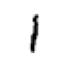

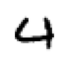

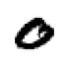

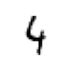

In [9]:
dls.show_batch()

In [10]:
#export
def get_dls(path, bs=4, num_workers=2):
    """
    Given image path, load the images.
    Batch size is specified by `bs` (default=4).
    """
    dblock = DataBlock(blocks = (TransformBlock, ImageBlock(cls=PILImageBW)),
                       get_x = generate_noise,
                       get_items = get_image_files,
                       splitter = IndexSplitter([]),
                       batch_tfms=Normalize.from_stats(mean=0.5, std=0.5)
                   )

    dls = dblock.dataloaders(path, path=path, bs=bs, num_workers=num_workers)

    return dls

In [13]:
dls      = get_dls(path, bs=4)
noise, x = dls.one_batch()

test_eq(noise.shape, (4, 64, 1, 1))
test_eq(x.shape, (4, 1, 28, 28))

In [16]:
if IN_COLAB:
  !pip install git+https://github.com/pete88b/nbdev_colab_helper.git
  from nbdev_colab_helper.core import *
  project_name = 'dcgan'
  init_notebook(project_name)

  Cloning https://github.com/pete88b/nbdev_colab_helper.git to /tmp/pip-req-build-b0lvdgk6
  Running command git clone -q https://github.com/pete88b/nbdev_colab_helper.git /tmp/pip-req-build-b0lvdgk6
  Created wheel for nbdev-colab-helper: filename=nbdev_colab_helper-0.0.1-cp36-none-any.whl size=9695 sha256=671c6a81d481af5bf9a7b56ea2e410aeb260ed61f71c89d5a039bac2affca4f3
  Stored in directory: /tmp/pip-ephem-wheel-cache-ogyv9pvm/wheels/11/52/f4/a49fbdda142e8992bb1695aa9eb30f499294a14cfb4b753fbe
Successfully built nbdev-colab-helper
Connecting to google drive
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/My Drive/Colab Notebooks/github/dcgan
pip install fastscript==1.0.0 fastcore==1.0.8 nbdev==1.0.14
  Found existing installation: fastcore 1.2.2
    Uninstalling fastcore-1.2.2:
      Successfully uninstalled fastcore-1.2.2
  Found existing installation: nbdev 1.1.4
    Uninstalling nbdev-1.

In [19]:
#hide
from nbdev.export import notebook2script
notebook2script()

Converted 00_data.ipynb.
Converted index.ipynb.


In [37]:
!git status

On branch main
Your branch is up to date with 'origin/main'.

Changes not staged for commit:
  (use "git add <file>..." to update what will be committed)
  (use "git checkout -- <file>..." to discard changes in working directory)

	modified:   00_data.ipynb

no changes added to commit (use "git add" and/or "git commit -a")


In [33]:
!git add 00_data.ipynb dcgan/*

The following paths are ignored by one of your .gitignore files:
dcgan/__pycache__
Use -f if you really want to add them.


In [34]:
!git commit -m 'Add module for data loading.'

[main 3dd750b] Add module for data loading.
 4 files changed, 46 insertions(+)
 create mode 100644 00_data.ipynb
 create mode 100644 dcgan/__init__.py
 create mode 100644 dcgan/_nbdev.py
 create mode 100644 dcgan/data.py


In [35]:
!git push origin main

Counting objects: 25, done.
Delta compression using up to 2 threads.
Compressing objects: 100% (23/23), done.
Writing objects: 100% (25/25), 16.04 KiB | 1.23 MiB/s, done.
Total 25 (delta 13), reused 0 (delta 0)
remote: Resolving deltas: 100% (13/13), completed with 8 local objects.
To https://github.com/numb3r33/dcgan.git
   957cf4f..3dd750b  main -> main
